# Airbnb Berlin Price Prediction

This is a Kaggle competition and can be found [here](https://www.kaggle.com/datasets/gauravduttakiit/airbnb-berlin-price-prediction)

# Libraries

In [18]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Functions

In [2]:
def print_NA_info(df: pd.DataFrame, feature:str):
    print(f"Number of unique values: {len(df[feature].unique())}")
    print(f"Unique values: {df[feature].unique()}")
    print(f"Shape train data: {df.shape}")
    na_per = ((df[feature].isna().sum() / len(df[feature])) * 100).round(2)
    print(f"The percentage of NA is: {na_per}%", end="\n\n")
    ##
    print(
        df
        .groupby(feature)[feature]
        .count()
    )

# Load data

In [3]:
# Load the dataset
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe."""
    
    return pd.read_csv(path / filename)


dataset_path = Path().absolute() / "data"

# Load dataset
filename = "train_airbnb_berlin.csv"
train = load_ds(dataset_path, filename)

In [4]:
print(f"Shape train data set: {train.shape}")

Shape train data set: (15692, 39)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             15691 non-null  float64
 1   Listing Name           15638 non-null  object 
 2   Host ID                15692 non-null  float64
 3   Host Name              15670 non-null  object 
 4   Host Since             15671 non-null  object 
 5   Host Response Time     8617 non-null   object 
 6   Host Response Rate     8617 non-null   object 
 7   Is Superhost           15669 non-null  object 
 8   neighbourhood          15692 non-null  object 
 9   Neighborhood Group     15692 non-null  object 
 10  City                   15691 non-null  object 
 11  Postal Code            15463 non-null  object 
 12  Country Code           15692 non-null  object 
 13  Country                15692 non-null  object 
 14  Latitude               15692 non-null  float64
 15  Lo

In [7]:
train.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


In [10]:
(train.isna().sum() / train.shape[0] * 100).round(2).reset_index()

,index,0
0,Listing ID,0.01
1,Listing Name,0.34
2,Host ID,0.00
3,Host Name,0.14
4,Host Since,0.13
5,Host Response Time,45.09
6,Host Response Rate,45.09
7,Is Superhost,0.15
8,neighbourhood,0.00
9,Neighborhood Group,0.00


Check where `Price` is NA

In [14]:
train.loc[train.Price.isna(), :]

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
1929,17616585.0,*,107891457.0,TWO Hotel Berlin By Axel - Adults,2018-05-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
2556,26350196.0,*,199004544.0,TWa Hotel Berlin By Axel - Adults,2018-06-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
3746,26205207.0,*,175078775.0,TW Hotel Berlin By Axel - Adults,2018-05-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
5531,29226856.0,*,165805342.0,TWO Hotel Berlin By Axel - Adults,2017-11-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,NaN
9302,32520779.0,*,240214818.0,St Christophers Inn Berlin,2019-02-28,a few days or more,0%,t,Mitte,Mitte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
9898,16161589.0,*,99517180.0,Axel Hotel Berlin - Adults Only,2016-10-05,within an hour,100%,f,SchÃ¶neberg,Tempelhof - SchÃ¶neberg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
10849,17224277.0,*,62178710.0,TW Hotel Berlin By Aeel - Adults,2016-03-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,75.0,10.0,8.0,10.0,9.0,8.0,10.0,t,f,NaN
11968,26697198.0,*,80918009.0,Axel Hotel Berlin - Adults Only,2016-08-05,within an hour,100%,f,SchÃ¶neberg,Tempelhof - SchÃ¶neberg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
14570,17937758.0,*,115965392.0,TWO Hotel Berlin By Axel - Adults,2017-01-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN


Remove the rows where `Price` is NA or 0

In [16]:
train = train.loc[~train.Price.isna(), :]

In [17]:
(train.isna().sum() / train.shape[0] * 100).round(2).reset_index()

,index,0
0,Listing ID,0.01
1,Listing Name,0.34
2,Host ID,0.00
3,Host Name,0.14
4,Host Since,0.13
5,Host Response Time,45.11
6,Host Response Rate,45.11
7,Is Superhost,0.15
8,neighbourhood,0.00
9,Neighborhood Group,0.00


# Split train/test set

In [19]:
# Split train and test data

X_y_train, X_y_test = train_test_split(train, test_size=0.2, random_state=123, shuffle=True)

X_y_train = X_y_train.reset_index(drop=True)
X_y_test = X_y_test.reset_index(drop=True)

print(f"shape data: {train.shape}")

print(f"\n{train.shape[0]} * 0.8 = {train.shape[0] * 0.8:.2f}")
print(f"shape X_y_train: {X_y_train.shape}")

print(f"\n{train.shape[0]} * 0.2 = {train.shape[0] * 0.2:.2f}")
print(f"shape X_y_test:  {X_y_test.shape}")

shape data: (15683, 39)

15683 * 0.8 = 12546.40
shape X_y_train: (12546, 39)

15683 * 0.2 = 3136.60
shape X_y_test:  (3137, 39)


In [20]:
# Save train and test sets
X_y_train.to_csv(Path().absolute() / "data" / "X_y_train.csv", index=False)
X_y_test.to_csv(Path().absolute() / "data" / "X_y_test.csv", index=False)

# EDA

## Price

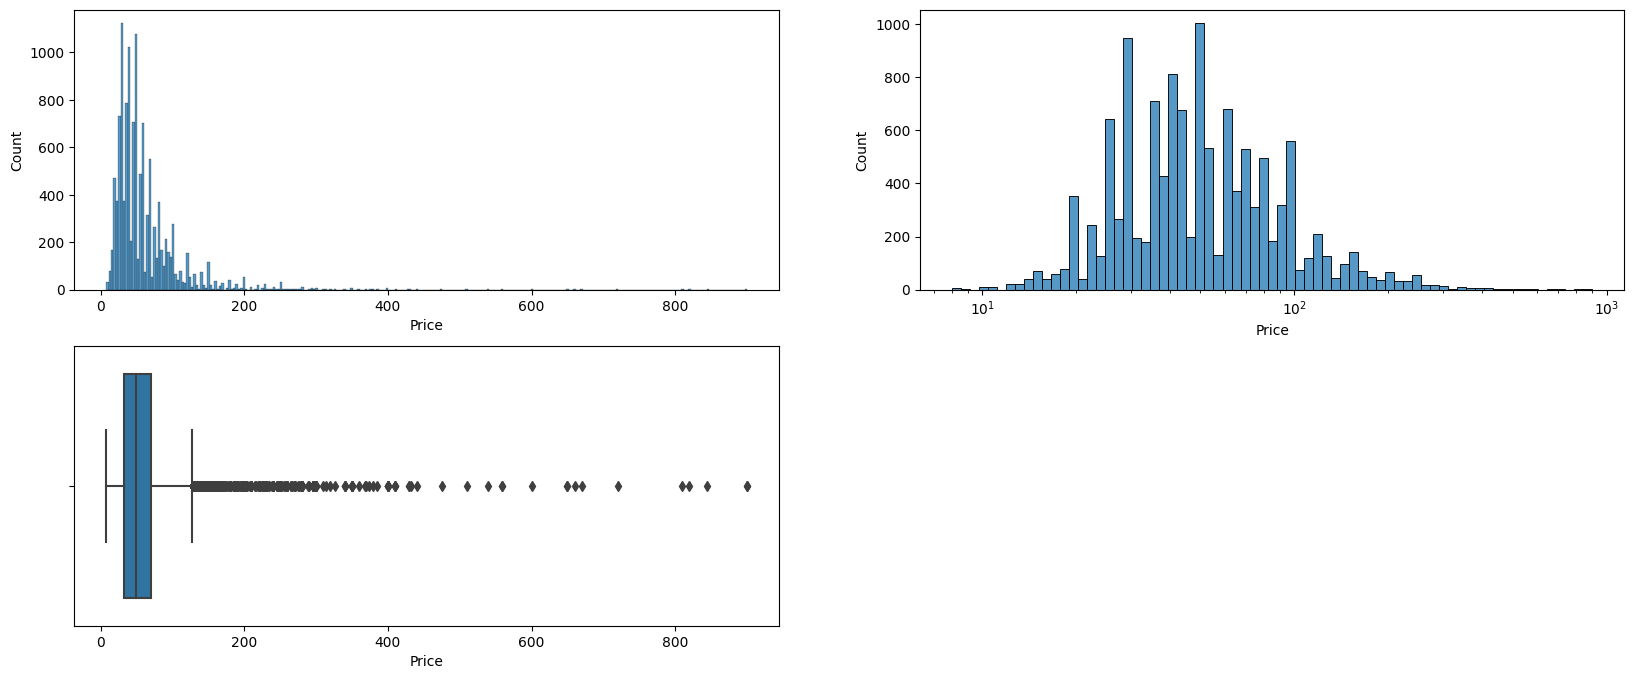

In [21]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
sns.histplot(X_y_train, x="Price")

plt.subplot(2, 2, 2)
sns.histplot(X_y_train, x="Price", log_scale=True)

plt.subplot(2, 2, 3)
sns.boxplot(x="Price", data=X_y_train)

plt.show()

## Host Since

In [23]:
print_NA_info(X_y_train, "Host Since")

Number of unique values: 2943
Unique values: ['2016-06-03' '2016-05-31' '2017-02-07' ... '2012-01-10' '2015-03-23'
 '2012-03-25']
Shape train data: (12546, 39)
The percentage of NA is: 0.13%

Host Since
2009-03-22     7
2009-04-14     1
2009-05-17     1
2009-06-19     1
2009-06-26     1
              ..
2019-05-04     1
2019-05-05     2
2019-05-06     1
2019-05-08     1
2019-05-10    17
Name: Host Since, Length: 2942, dtype: int64


In [28]:
date2 = pd.to_datetime(X_y_train["Host Since"], format="%Y-%m-%d") # format="%d/%m/%Y"
# month = date2.dt.month
year = date2.dt.year
# day = date2.dt.day

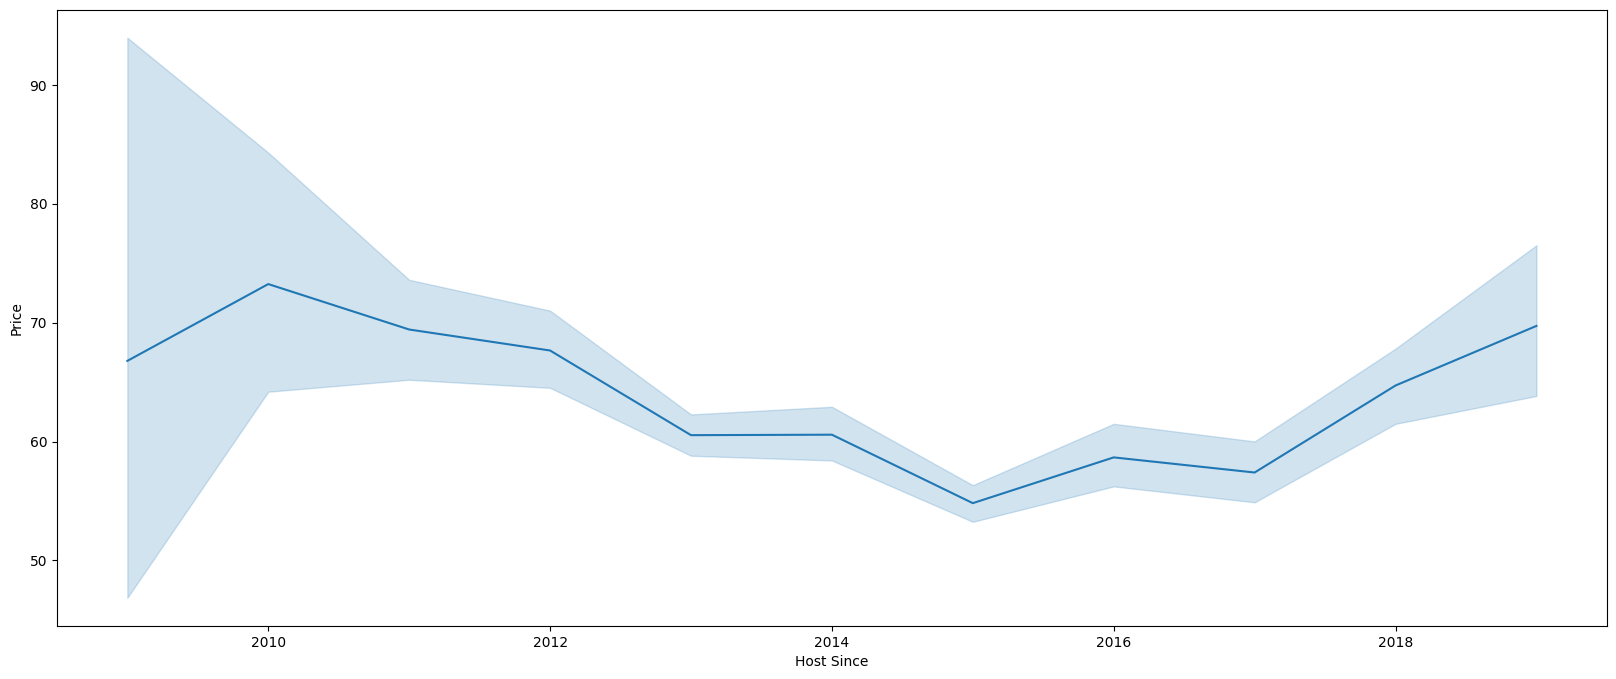

In [29]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=year, y="Price", data=X_y_train)
plt.show()

## Is Superhost

In [31]:
print_NA_info(X_y_train, "Is Superhost")

Number of unique values: 3
Unique values: ['t' 'f' nan]
Shape train data: (12546, 39)
The percentage of NA is: 0.14%

Is Superhost
f    10578
t     1950
Name: Is Superhost, dtype: int64


## neighbourhood

In [32]:
print_NA_info(X_y_train, "neighbourhood")

Number of unique values: 63
Unique values: ['*' 'Kreuzberg' 'KÃ¶penick' 'NeukÃ¶lln' 'Mitte' 'Friedrichshain'
 'Prenzlauer Berg' 'Wedding' 'Moabit' 'SchÃ¶neberg' 'Charlottenburg'
 'Halensee' 'Friedrichsfelde' 'Pankow' 'Lichtenberg' 'Zehlendorf'
 'Altglienicke' 'OberschÃ¶neweide' 'Alt-Treptow' 'Tiergarten' 'Mahlsdorf'
 'Wilmersdorf' 'Tegel' 'Schmargendorf' 'WeiÃ\x9fensee' 'Friedrichshagen'
 'Reinickendorf' 'Steglitz' 'Westend' 'Adlershof' 'Tempelhof' 'Friedenau'
 'Rummelsburg' 'Alt-HohenschÃ¶nhausen' 'Britz' 'Wannsee' 'PlÃ¤nterwald'
 'NiederschÃ¶nhausen' 'NiederschÃ¶neweide' 'Baumschulenweg' 'Lichterfelde'
 'Nikolassee' 'Rahnsdorf' 'Grunewald' 'Karlshorst' 'Lankwitz' 'Spandau'
 'Lichtenrade' 'Wittenau' 'Hansaviertel' 'Mariendorf' 'Johannisthal'
 'Rudow' 'Fennpfuhl' 'Potsdamer Platz' 'SchmÃ¶ckwitz' 'Karow' 'Marzahn'
 'Biesdorf' 'Buckow' 'Dahlem' 'Wilhelmstadt' 'FranzÃ¶sisch Buchholz']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

neighbourhood
*                        174
A

# Neighborhood Group

In [33]:
print_NA_info(X_y_train, "Neighborhood Group")

Number of unique values: 12
Unique values: ['Reinickendorf' 'Friedrichshain-Kreuzberg' 'Treptow - KÃ¶penick'
 'NeukÃ¶lln' 'Mitte' 'Pankow' 'Tempelhof - SchÃ¶neberg'
 'Charlottenburg-Wilm.' 'Lichtenberg' 'Steglitz - Zehlendorf'
 'Marzahn - Hellersdorf' 'Spandau']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Neighborhood Group
Charlottenburg-Wilm.         879
Friedrichshain-Kreuzberg    3001
Lichtenberg                  424
Marzahn - Hellersdorf        107
Mitte                       2505
NeukÃ¶lln                   1948
Pankow                      2007
Reinickendorf                178
Spandau                       47
Steglitz - Zehlendorf        247
Tempelhof - SchÃ¶neberg      857
Treptow - KÃ¶penick          346
Name: Neighborhood Group, dtype: int64


## Property Type

In [34]:
print_NA_info(X_y_train, "Property Type")

Number of unique values: 16
Unique values: ['*' 'Apartment' 'Guest suite' 'Loft' 'House' 'Guesthouse' 'Condominium'
 'Other' 'Townhouse' 'Bed and breakfast' 'Serviced apartment'
 'Boutique hotel' 'Boat' 'Hostel' 'Hotel' 'Bungalow']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Property Type
*                        61
Apartment             11284
Bed and breakfast        42
Boat                      5
Boutique hotel           14
Bungalow                 11
Condominium             311
Guest suite              40
Guesthouse               23
Hostel                   47
Hotel                    24
House                   224
Loft                    274
Other                    31
Serviced apartment       99
Townhouse                56
Name: Property Type, dtype: int64


## Room Type

In [35]:
print_NA_info(X_y_train, "Room Type")

Number of unique values: 3
Unique values: ['Entire home/apt' 'Private room' 'Shared room']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Room Type
Entire home/apt    6128
Private room       6294
Shared room         124
Name: Room Type, dtype: int64


## Accomodates

In [36]:
print_NA_info(X_y_train, "Accomodates")

Number of unique values: 13
Unique values: ['3' '2' '4' '6' '1' '5' '7' '9' '8' '*' '10' '12' '16']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Accomodates
*       18
1     1400
10      25
12      11
16       2
2     6833
3     1512
4     1777
5      387
6      402
7       68
8       81
9       30
Name: Accomodates, dtype: int64


In [41]:
X_y_train.loc[X_y_train.Accomodates == "*", "Accomodates"] = np.nan

In [42]:
print_NA_info(X_y_train, "Accomodates")

Number of unique values: 13
Unique values: ['3' '2' '4' '6' '1' '5' '7' '9' '8' nan '10' '12' '16']
Shape train data: (12546, 39)
The percentage of NA is: 0.14%

Accomodates
1     1400
10      25
12      11
16       2
2     6833
3     1512
4     1777
5      387
6      402
7       68
8       81
9       30
Name: Accomodates, dtype: int64


## Bathrooms

In [43]:
print_NA_info(X_y_train, "Bathrooms")

Number of unique values: 9
Unique values: ['1.0' '2.0' '1.5' '*' '0.5' nan '0.0' '2.5' '3.0']
Shape train data: (12546, 39)
The percentage of NA is: 0.08%

Bathrooms
*         10
0.0        5
0.5       48
1.0    11037
1.5      655
2.0      720
2.5       37
3.0       24
Name: Bathrooms, dtype: int64


## Bedrooms

In [44]:
print_NA_info(X_y_train, "Bedrooms")

Number of unique values: 8
Unique values: ['0.0' '1.0' '2.0' '3.0' '4.0' '*' '5.0' nan]
Shape train data: (12546, 39)
The percentage of NA is: 0.02%

Bedrooms
*         9
0.0     913
1.0    9453
2.0    1682
3.0     406
4.0      64
5.0      17
Name: Bedrooms, dtype: int64


## Beds

In [45]:
print_NA_info(X_y_train, "Beds")

Number of unique values: 13
Unique values: ['2.0' '1.0' '4.0' '3.0' '6.0' '5.0' '0.0' '*' '8.0' '7.0' '9.0' '10.0'
 nan]
Shape train data: (12546, 39)
The percentage of NA is: 0.04%

Beds
*          7
0.0       19
1.0     8019
10.0      11
2.0     2968
3.0      767
4.0      426
5.0      152
6.0      117
7.0       24
8.0       23
9.0        8
Name: Beds, dtype: int64


## Min Nights

In [46]:
print_NA_info(X_y_train, "Min Nights")

Number of unique values: 25
Unique values: ['5' '2' '3' '1' '7' '25' '20' '4' '14' '60' '10' '6' '180' '30' '21' '9'
 '8' '90' '*' '28' '12' '15' '61' '13' '62']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Min Nights
*       196
1      2936
10      138
12       26
13       21
14      192
15       34
180      43
2      3207
20       68
21       46
25       17
28       33
3      2515
30      114
4       964
5       846
6       267
60      159
61       15
62       17
7       521
8        42
9        36
90       93
Name: Min Nights, dtype: int64


## Instant Bookable

In [48]:
print_NA_info(X_y_train, "Instant Bookable")

Number of unique values: 2
Unique values: ['f' 't']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Instant Bookable
f    8357
t    4189
Name: Instant Bookable, dtype: int64


## Business Travel Ready

In [49]:
print_NA_info(X_y_train, "Business Travel Ready")

Number of unique values: 1
Unique values: ['f']
Shape train data: (12546, 39)
The percentage of NA is: 0.0%

Business Travel Ready
f    12546
Name: Business Travel Ready, dtype: int64
